In [20]:
import pandas as pd
import numpy as np

In [21]:
# Load a sample of your data
df = pd.read_csv("FinalDataSetJobOffers.csv").sample(n=1000, random_state=42)


In [3]:
df.shape

(1000, 8)

In [4]:
df.head()

,Job post,Company name,Job description,Required skills,Location,Company rating,Company review,Experience required
16933,robert bosch hire firmwar engin coimbator,rbei,job descriptionjob natur detail requir analysi...,embed c++ embed c embed develop microcontrol a...,coimbator,4.3,3368.0,1-6 yr
22267,market research execut kolkata offic rashmi group,rashmi metalik limit,graduat /master econom good ms-offic,research excel secondari research data analysi...,kolkata,3.6,375.0,2-7 yr
19179,tele caller,pcpatcher technolog pvt ltd,experi 2-4 year skill requir candid good commu...,help desk custom servic data analysi custom re...,delhi,3.8,12.0,2-4 yr
5871,oper engin,global analyt,flexibl work rotat shift 24x7 activ report esc...,commun skill phyton program sql skill python p...,chennai,4.2,44.0,0-0 yr
1255,softwar engin,xpanxion,job descriptiontechn skill mandatori strong 2+...,net core core jenkin node j saa agil backbon j...,hyderabad/secunderabad pune ahmedabad bangalor...,3.9,121.0,2-5 yr


In [6]:
# Check for missing or NaN values
print(df.isna().sum())

# Drop the rows that contain missing or NaN values
data = df.dropna()

# Verify that there are no more missing or NaN values
print(df.isna().sum())

Job post               0
Company name           0
Job description        0
Required skills        0
Location               0
Company rating         0
Company review         0
Experience required    0
dtype: int64
Job post               0
Company name           0
Job description        0
Required skills        0
Location               0
Company rating         0
Company review         0
Experience required    0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 16933 to 33012
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job post             1000 non-null   object 
 1   Company name         1000 non-null   object 
 2   Job description      1000 non-null   object 
 3   Required skills      1000 non-null   object 
 4   Location             1000 non-null   object 
 5   Company rating       1000 non-null   float64
 6   Company review       1000 non-null   float64
 7   Experience required  1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 70.3+ KB


In [8]:
df.describe()

,Company rating,Company review
count,1000.000000,1000.000000
mean,3.977578,3500.686000
std,0.466066,7726.925791
min,-1.000000,2.000000
25%,3.900000,34.750000
50%,4.000000,147.000000
75%,4.200000,1036.000000
max,5.000000,26627.000000


In [10]:
# Separate the categorical and numerical features
#cat_cols = ['Job post', 'Company name', 'Job description', 'Required skills', 'Location', 'Experience required']
#num_cols = ['Company rating', 'Company review']

In [12]:
#from sklearn.preprocessing import OneHotEncoder
# One-hot encode the categorical features
#encoder = OneHotEncoder(sparse=True)
#cat_data = encoder.fit_transform(data[cat_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
#from sklearn.preprocessing import StandardScaler
# Standardize the numerical features
#scaler = StandardScaler()
#num_data = scaler.fit_transform(data[num_cols])

In [17]:
# Convert the numerical data to a DataFrame
#data[num_cols] = pd.DataFrame(data[num_cols])

In [18]:
n#um_data = data[num_cols].to_numpy()

In [13]:
!pip install prince
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.6/414.6 kB 7.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import numpy as np
import pandas as pd
from prince import FAMD
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
random_state = 1234
pd.options.plotting.backend = "plotly"

In [36]:
def plot_cluster(X, y, title="Cluster plot"):
    fig = px.scatter(X, x='Job description', y='Required skills', color=y, width=475, height=475)
    fig.update_layout(autosize=False, coloraxis=dict(showscale=False, colorscale='Portland'), font=dict(size=18),
                      title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=15))
    return fig


In [37]:
X, y = make_blobs(n_samples=50, centers=3, n_features=8, random_state=random_state)

# Concatenate the one-hot encoded categorical data with the numerical data
X = pd.DataFrame(X, columns=['Job post', 'Company name', 'Job description', 'Required skills', 'Location', 'Company rating', 'Company review', 'Experience required'])

con_feats = ['Company rating', 'Company review']
cat_feats = ['Job post', 'Company name', 'Job description', 'Required skills', 'Location', 'Experience required']
scale = StandardScaler()
X[con_feats] = scale.fit_transform(X[con_feats])
X.head()


,Job post,Company name,Job description,Required skills,Location,Company rating,Company review,Experience required
0,-2.300334,7.054616,3.311693,2.170031,-6.141161,-0.309347,-1.185590,7.022419
1,-4.921173,-0.719060,-0.202989,-3.383755,2.861178,-0.198905,0.899192,-3.570018
2,-2.147562,8.369166,5.001274,3.511206,-6.915453,0.902616,-2.276688,8.145425
3,-2.543909,7.845608,5.782702,2.725103,-6.088595,-1.249459,-0.523966,5.921672
4,-4.737376,0.738816,-1.116133,-4.682360,1.766020,-0.543629,0.273561,-4.080227


In [38]:
import plotly.express as px
fig = plot_cluster(X, y, title="True Data")
fig.show()

The first question I asked myself when dealing with my mixed data was “Do I really need the information contained in the categorical features to extract patterns in my dataset?”. It could be that the continuous features available to you in your mixed data are adequate for grouping the data into representative clusters. So the first thing we’ll try here is to simply ignore our single categorical feature (which standard algorithms like k-means and DBSCAN don’t like), and only cluster based on our continuous features.

In [39]:
model = KMeans(n_clusters=3, random_state=random_state).fit(X[con_feats])
pred = model.labels_
fig = plot_cluster(X, pred, title="Continuous Only")
fig

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Next we’ll try encoding the categorical data using one hot encoding so that we can include it in k-means clustering (note that you may also want to try scaling the data after OHE but I didn’t do that here for succinctness).

In [40]:
model = KMeans(n_clusters=3, random_state=random_state).fit(pd.get_dummies(X))
pred = model.labels_
fig = plot_cluster(X, pred, title="Encoded Categorical Data")
fig

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Use the k-prototypes algorithm
The k-prototypes algorithm can work directly with the categorical data, without the need for encoding. I defer to the k-prototypes documentation and the original paper by Huang (1997) for an explanation of how the algorithm works.

In [41]:
pred = KPrototypes(n_clusters=3).fit_predict(X, categorical=[2])
fig = plot_cluster(X, pred.astype(float), title="k-prototypes")
fig

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3).fit(X)
pca.transform(X)[:5]

array([[-11.34388163,  -3.59173812,   0.28222754],
       [  0.12571984,   9.48220341,  -0.12518666],
       [-13.0775672 ,  -5.7233151 ,   0.738477  ],
       [-12.15080082,  -3.60314926,   0.62874612],
       [ -0.34300823,   9.48337164,  -0.17996079]])

In [48]:
def plot_clusterpca(X, y, title="Cluster plot"):
    fig = px.scatter(X, x='PC1', y='PC2', color=y, width=475, height=475)
    fig.update_layout(autosize=False, coloraxis=dict(showscale=False, colorscale='Portland'), font=dict(size=18),
                      title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=15))
    return fig

In [53]:
model = KMeans(n_clusters=3, random_state=random_state).fit(X_pca)
pred = model.labels_

fig = plot_clusterpca(pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3']), pred, title="PCA + Clustering")
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [56]:
# Calculate silhouette score
score = silhouette_score(X_pca, pred, metric='euclidean', random_state=random_state)
print("Silhouette score:", score)

Silhouette score: 0.8806909904719317


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

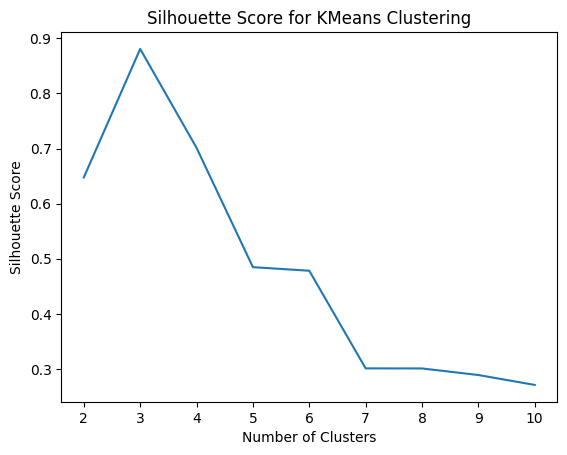

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_pca, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.show()


In [59]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2], mode='markers', marker=dict(color=pred, size=5))])
fig.update_layout(title='PCA + Clustering in 3D')
fig.show()


In [60]:
import plotly.express as px

fig = px.parallel_coordinates(X, color=y, width=800, height=500)
fig.show()


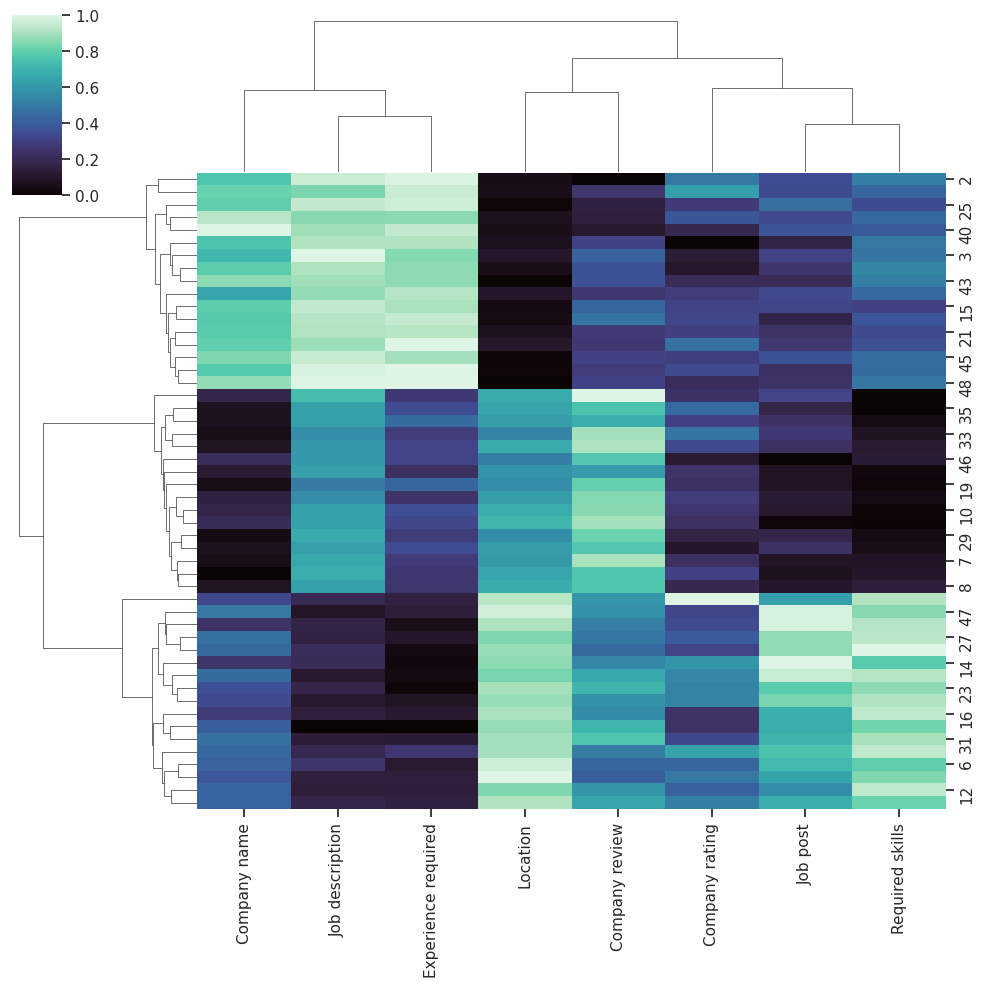

In [62]:
sns.clustermap(X, cmap="mako", standard_scale=1)

In [66]:
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

In [68]:
import scipy.cluster.hierarchy as sch

Z = sch.linkage(X_pca, method='ward')
fig = px.scatter_3d(X_pca, x='PC1', y='PC2', z='PC3', color=labels)
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(title='PCA + Hierarchical Clustering')
fig.show()
